In [1]:
from autoRIFT import autoRIFT
from imview import pltlib
from pygeotools.lib import iolib,geolib,malib
import matplotlib.pyplot as plt
import os,sys,glob

In [2]:
l_img = '/nobackupp2/sbhusha1/vmap_comparison_testing/Cropped/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s.TIF'
r_img = '/nobackupp2/sbhusha1/vmap_comparison_testing/Cropped/LC08_L1TP_061018_20180608_20180615_01_T1_B8_s.TIF'

In [6]:
l_img_ds = iolib.fn_getds(l_img)
r_img_ds = iolib.fn_getds(r_img)

In [7]:
l_img_ma = iolib.ds_getma(l_img_ds)
r_img_ma = iolib.ds_getma(r_img_ds)

<AxesSubplot:>

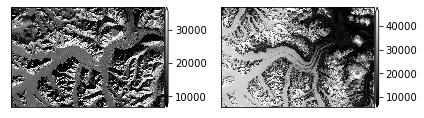

In [8]:
f,ax = plt.subplots(1,2)
pltlib.iv(l_img_ma,ax=ax[0],cmap='gray')
pltlib.iv(r_img_ma,ax=ax[1],cmap='gray')

These images have a very different sun-angle, and by default the correlator struggled. Can we do pre-processing of some kind to remove this effect of sun-angle and get a better output ?
Maybe use one of the autoRIFT preprocessing implementations ?

In [10]:
obj = autoRIFT()
obj.I1 = l_img_ma
obj.I2 = r_img_ma

In [11]:
obj.preprocess_filt_lap()

### Laplacian Filter

/nobackupp2/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

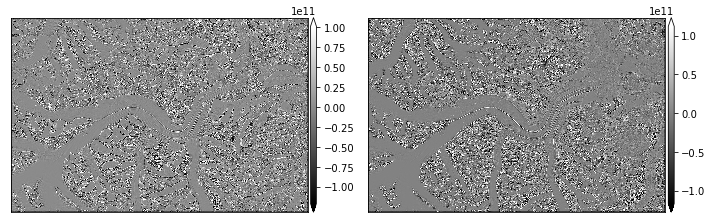

In [12]:
f,ax = plt.subplots(1,2,figsize=(10,4.5))
pltlib.iv(obj.I1,ax=ax[0],cmap='gray')
pltlib.iv(obj.I2,ax=ax[1],cmap='gray')

In [15]:
obj.I1

array([[-5.17925077e+11, -9.24500492e+11, -1.01818565e+12, ...,
        -1.13261727e+12, -9.98430343e+11, -5.34799417e+11],
       [-9.38508157e+11, -1.53133541e+12, -1.70785269e+12, ...,
        -1.89582357e+12, -1.66280141e+12, -9.89687841e+11],
       [-1.05209686e+12, -1.73166821e+12, -1.93263370e+12, ...,
        -2.14779455e+12, -1.88538277e+12, -1.11509399e+12],
       ...,
       [-1.15279633e+12, -1.92430434e+12, -2.17697026e+12, ...,
        -2.02373267e+12, -1.78096859e+12, -1.05352325e+12],
       [-1.02075780e+12, -1.69257573e+12, -1.91256199e+12, ...,
        -1.78424434e+12, -1.56929321e+12, -9.34860423e+11],
       [-5.51405224e+11, -1.01173356e+12, -1.13238213e+12, ...,
        -1.05772909e+12, -9.36568816e+11, -5.01530493e+11]], dtype=float32)

In [13]:
l_img_lap = os.path.splitext(l_img)[0]+'_lap.tif'
r_img_lap = os.path.splitext(r_img)[0]+'_lap.tif'

In [16]:
iolib.writeGTiff(obj.I1,l_img_lap,src_ds=l_img_ds)
iolib.writeGTiff(obj.I2,r_img_lap,src_ds=r_img_ds)

##### Correlation reuslt

In [ ]:
vm_lap = iolib.fn_getma('LC08_L1TP_061018_20180304_20180319_01_T1_B8_s_lap__LC08_L1TP_061018_20180608_20180615_01_T1_B8_s_lap_vmap_minm_35px_spm1/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s_lap__LC08_L1TP_061018_20180608_20180615_01_T1_B8_s_lap_vmap_minm_35px_spm1-F_vm.tif')
f,ax = plt.subplots()
pltlib.iv(vm_lap,cmap='viridis')

ASP does not like it.

### High pass Filter

In [62]:
obj = autoRIFT()
obj.I1 = l_img_ma
obj.I2 = r_img_ma

In [63]:
obj.preprocess_filt_hps()

<AxesSubplot:>

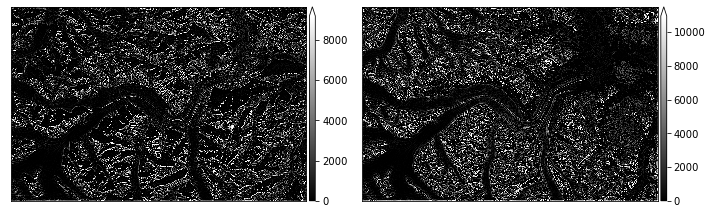

In [52]:
f,ax = plt.subplots(1,2,figsize=(10,4.5))
pltlib.iv(obj.I1,ax=ax[0],cmap='gray')
pltlib.iv(obj.I2,ax=ax[1],cmap='gray')

In [53]:
obj.uniform_data_type()

/nobackupp2/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

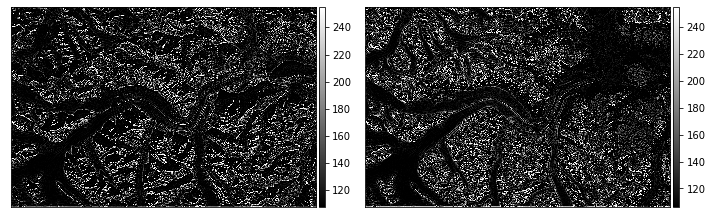

In [54]:
f,ax = plt.subplots(1,2,figsize=(10,4.5))
pltlib.iv(obj.I1,ax=ax[0],cmap='gray')
pltlib.iv(obj.I2,ax=ax[1],cmap='gray')

Reverse this ?

In [64]:
import numpy as np

In [65]:
l_img_c = np.abs(obj.I1 - np.max(obj.I1))
r_img_c = np.abs(obj.I2 - np.max(obj.I2))

<AxesSubplot:>

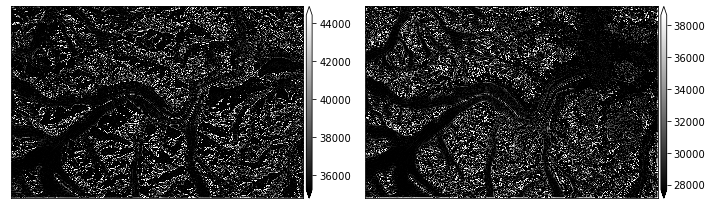

In [66]:
f,ax = plt.subplots(1,2,figsize=(10,4.5))
pltlib.iv(l_img_c,ax=ax[0],cmap='gray')
pltlib.iv(r_img_c,ax=ax[1],cmap='gray')

This might work ! Looks more like a hillshade.

Well ASP pretty much fails with everything which has been enhanced to bring out edges. During stereo_pprc, the stats computed are 0,0,0,0(mean,std,high,low). The correlator thus gets a totally black image to work on (all 0), so the output is not any good !

In [60]:
l_img_high_pass = os.path.splitext(l_img)[0]+'_hp_r.tif'
r_img_high_pass = os.path.splitext(r_img)[0]+'_hp_r.tif'

In [61]:
iolib.writeGTiff(l_img_c,l_img_high_pass,src_ds=l_img_ds)
iolib.writeGTiff(r_img_c,r_img_high_pass,src_ds=r_img_ds)

### Wallis Filter

In [47]:
obj = autoRIFT()
obj.I1 = l_img_ma
obj.I2 = r_img_ma

In [48]:
obj.preprocess_filt_wal()

/nobackup/sbhusha1/sw/miniconda3/envs/icesat2020/lib/python3.7/site-packages/autoRIFT/autoRIFT.py:69: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(m2 - m**2) * np.sqrt(np.sum(kernel)/(np.sum(kernel)-1.0))
/nobackup/sbhusha1/sw/miniconda3/envs/icesat2020/lib/python3.7/site-packages/autoRIFT/autoRIFT.py:81: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(m2 - m**2) * np.sqrt(np.sum(kernel)/(np.sum(kernel)-1.0))


/nobackupp2/sbhusha1/sw/imview/imview/lib/pltlib.py:149: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad('k', alpha=1)


<AxesSubplot:>

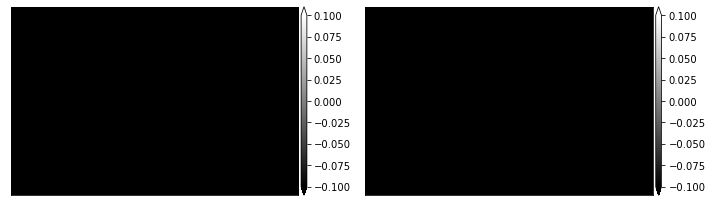

In [49]:
f,ax = plt.subplots(1,2,figsize=(10,4.5))
pltlib.iv(obj.I1,ax=ax[0],cmap='gray')
pltlib.iv(obj.I2,ax=ax[1],cmap='gray')

### AutoRIFT output

In [67]:
vm_auto_lap = iolib.fn_getma('/nobackupp2/sbhusha1/vmap_comparison_testing/processing_comparison/compare_diff_ill/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s__LC08_L1TP_061018_20180608_20180615_01_T1_B8_s_min_min_chip_32.0_max_chip_128.0/LC08_L1TP_061018_20180304_20180319_01_T1_B8_s__LC08_L1TP_061018_20180608_20180615_01_T1_B8_s_min_min_chip_32.0_max_chip_128.0-F_vm.tif')

<AxesSubplot:>

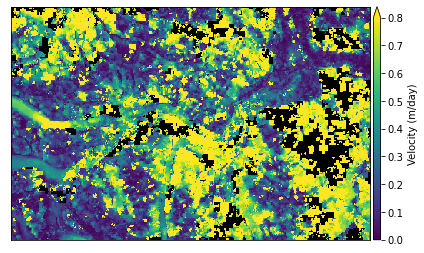

In [71]:
f,ax = plt.subplots()
pltlib.iv(vm_auto_lap,cmap='viridis',ax=ax,clim=(0,0.8),label='Velocity (m/day)')

Ok, so looks like correlation on pre-processed images (here Laplacian filter) gives a plausible result from autorift, although I need to research more on how to get the best velocity from it. Too bad ASP cant use images which have been enhanced already as inputs :(. Or maybe it can, need to look into documentation and talk to David.